In [6]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import os

#Create a set of random lats and long
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [22]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [23]:
coordinates = list(lat_lngs)

In [24]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
#from citipy import citipy
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          #citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [26]:
#Create a new list
cities = []
#Identify the nearest city for each latitude and longitude combination
for coords in coordinates:
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    
    #If Unique, add to list
    if city not in cities:
        cities.append(city)
#Print the count
len(cities)

606

In [27]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=061e3a9275eae6c0c2fca9b97e24968d


In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=061e3a9275eae6c0c2fca9b97e24968d&q=Boston


In [30]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f'City Weather found.')
else:
    print (f'City weather not found.')
# Get the text of the 'Get' request.
city_weather.text
# Get the JSON text of the 'Get' request.
city_weather.json()

City Weather found.


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 88.74,
  'feels_like': 95.31,
  'temp_min': 84.16,
  'temp_max': 92.44,
  'pressure': 1014,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 288, 'gust': 8.99},
 'clouds': {'all': 58},
 'dt': 1658671211,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1658654922,
  'sunset': 1658707948},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [32]:
# Get the JSON data.
boston_data = city_weather.json()

In [33]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1658654922,
 'sunset': 1658707948}

In [34]:
boston_data['dt']

1658671211

In [35]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 92.44 57 58 5.01


In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-24 14:00:11'

In [37]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | llanes
Processing Record 3 of Set 1 | mezen
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | moose factory
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | milingimbi
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | innisfail
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | akyab
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1

Processing Record 32 of Set 4 | ancud
Processing Record 33 of Set 4 | fairhope
Processing Record 34 of Set 4 | tateyama
Processing Record 35 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 4 | russell
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | portland
Processing Record 39 of Set 4 | sabang
Processing Record 40 of Set 4 | port keats
Processing Record 41 of Set 4 | ayan
Processing Record 42 of Set 4 | senneterre
Processing Record 43 of Set 4 | sur
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | sao jose da coroa grande
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | barawe
City not found. Skipping...
Processing Record 49 of Set 4 | show low
Processing Record 50 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 1 of Set 5 | lolua
City not found. Skipping...
Processing Record 2 of Set 5 | yulara
Processing Record 3 

City not found. Skipping...
Processing Record 17 of Set 8 | ixtapa
Processing Record 18 of Set 8 | ulladulla
Processing Record 19 of Set 8 | kokopo
Processing Record 20 of Set 8 | shwebo
Processing Record 21 of Set 8 | karaul
City not found. Skipping...
Processing Record 22 of Set 8 | andros town
Processing Record 23 of Set 8 | narsaq
Processing Record 24 of Set 8 | karratha
Processing Record 25 of Set 8 | hami
Processing Record 26 of Set 8 | padang
Processing Record 27 of Set 8 | argelia
Processing Record 28 of Set 8 | sulzbach-rosenberg
Processing Record 29 of Set 8 | sibolga
Processing Record 30 of Set 8 | yar-sale
Processing Record 31 of Set 8 | ocampo
Processing Record 32 of Set 8 | ankang
Processing Record 33 of Set 8 | baragua
Processing Record 34 of Set 8 | naftah
City not found. Skipping...
Processing Record 35 of Set 8 | chabahar
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | evensk
Processing Record 38 of Set 8 | kachiry
Processing Record 39 of Set

Processing Record 6 of Set 12 | mayo
Processing Record 7 of Set 12 | sao gotardo
Processing Record 8 of Set 12 | doha
Processing Record 9 of Set 12 | codrington
Processing Record 10 of Set 12 | bardiyah
Processing Record 11 of Set 12 | biak
Processing Record 12 of Set 12 | sandnessjoen
Processing Record 13 of Set 12 | dezful
Processing Record 14 of Set 12 | trapani
Processing Record 15 of Set 12 | durania
Processing Record 16 of Set 12 | kopong
Processing Record 17 of Set 12 | iberia
Processing Record 18 of Set 12 | ghanzi
Processing Record 19 of Set 12 | waipawa
Processing Record 20 of Set 12 | kibre mengist
Processing Record 21 of Set 12 | alyangula
Processing Record 22 of Set 12 | xunchang
Processing Record 23 of Set 12 | altamira
Processing Record 24 of Set 12 | abonnema
Processing Record 25 of Set 12 | marsaxlokk
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 28 of Set 12 | bulgan
Proc

In [43]:
len(city_data)

549

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Llanes,43.4198,-4.7549,76.84,74,4,7.25,ES,2022-07-24 14:00:12
1,Mezen,65.8522,44.2400,60.71,57,56,9.62,RU,2022-07-24 14:00:13
2,Dikson,73.5069,80.5464,45.03,83,100,17.87,RU,2022-07-24 14:00:13
3,Iqaluit,63.7506,-68.5145,45.70,93,100,4.00,CA,2022-07-24 14:00:15
4,Hobart,-42.8794,147.3294,49.05,91,20,5.75,AU,2022-07-24 13:56:57
5,Hilo,19.7297,-155.0900,78.28,90,100,4.61,US,2022-07-24 14:00:16
6,Moose Factory,51.2585,-80.6094,55.53,96,100,6.73,CA,2022-07-24 14:00:16
7,Busselton,-33.6500,115.3333,55.15,76,75,11.01,AU,2022-07-24 14:00:17
8,Albany,42.6001,-73.9662,85.95,56,38,1.99,US,2022-07-24 14:00:18
9,Innisfail,-17.5333,146.0333,66.60,81,95,3.11,AU,2022-07-24 14:00:18


In [58]:
new_column_order = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Llanes,4,ES,2022-07-24 14:00:12,74,43.4198,-4.7549,76.84,7.25
1,Mezen,56,RU,2022-07-24 14:00:13,57,65.8522,44.2400,60.71,9.62
2,Dikson,100,RU,2022-07-24 14:00:13,83,73.5069,80.5464,45.03,17.87
3,Iqaluit,100,CA,2022-07-24 14:00:15,93,63.7506,-68.5145,45.70,4.00
4,Hobart,20,AU,2022-07-24 13:56:57,91,-42.8794,147.3294,49.05,5.75
5,Hilo,100,US,2022-07-24 14:00:16,90,19.7297,-155.0900,78.28,4.61
6,Moose Factory,100,CA,2022-07-24 14:00:16,96,51.2585,-80.6094,55.53,6.73
7,Busselton,75,AU,2022-07-24 14:00:17,76,-33.6500,115.3333,55.15,11.01
8,Albany,38,US,2022-07-24 14:00:18,56,42.6001,-73.9662,85.95,1.99
9,Innisfail,95,AU,2022-07-24 14:00:18,81,-17.5333,146.0333,66.60,3.11


In [60]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
city_data_load = os.path.join("weather_data", "cities.csv")
city_data_df = pd.read_csv(city_data_load)

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

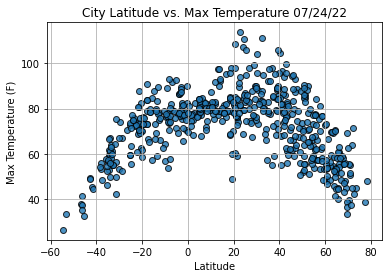

In [8]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

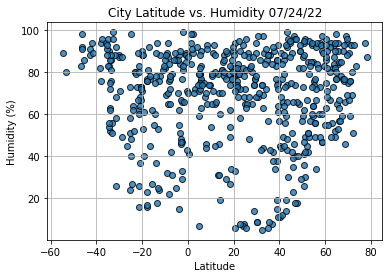

In [9]:
 #Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

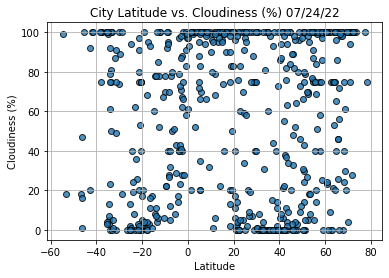

In [10]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

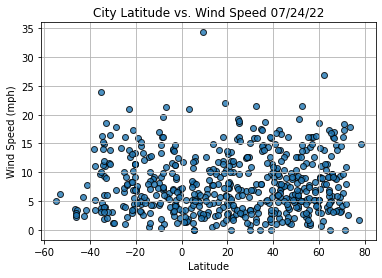

In [11]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [12]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [13]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [14]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [15]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

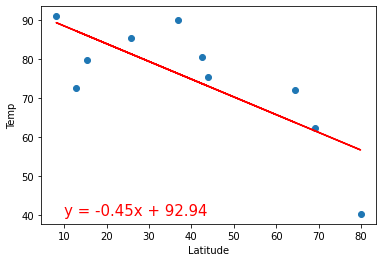

In [16]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


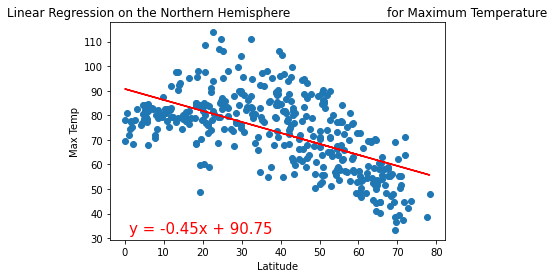

-0.5993944122034776

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,32))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

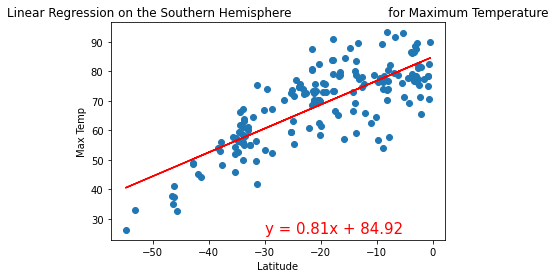

0.7838606443992615

In [20]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,25))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

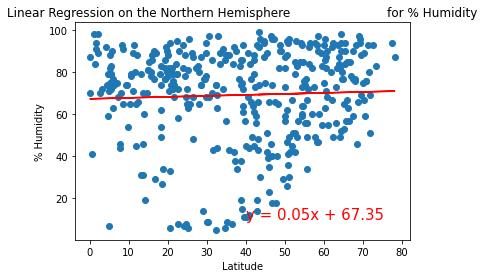

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

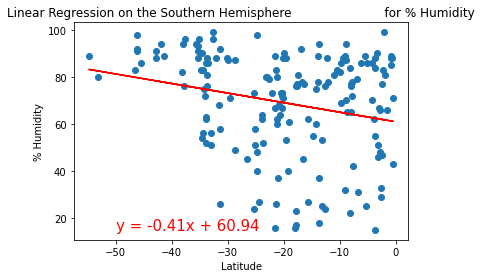

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Humidity', '% Humidity',(-50,15))

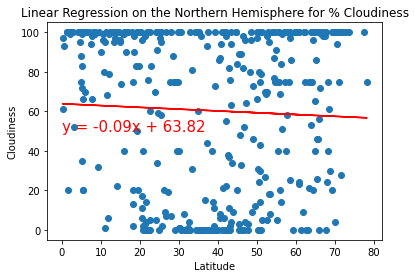

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(0,50))

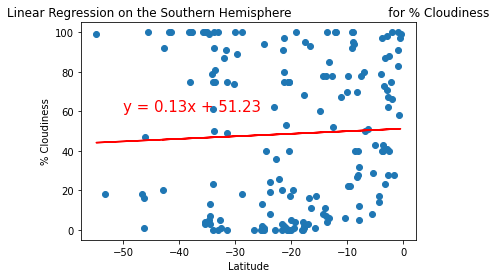

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

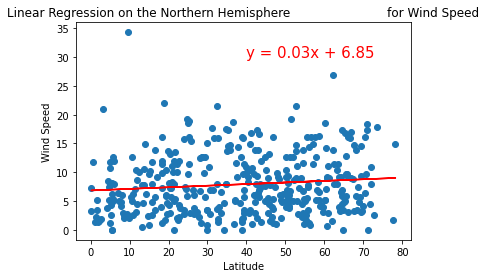

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

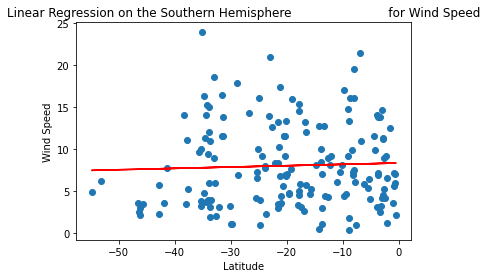

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))